## Nozomu Nakanishi
2020264 /
CA 2 - 26/05 - MsC Data Analytics

In [1]:
# Importing the libraries required for the analysis
import pandas as pd # data handling and visualization 
import numpy as np # for numerical operations
import seaborn as sns #visualisation
import matplotlib.pyplot as plt # visualization
from matplotlib import pyplot # Importing pyplot
import matplotlib.ticker as ticker
%matplotlib inline
# Stylesheet for matplotlib and seaborn
pd.set_option('display.max_columns', 200) # Show all columns from the Dataset.

import warnings # filter warnings
warnings.filterwarnings('ignore')

## Planning Permissions (All types and total of m2 of permissions granted)

The first dataset to be manipulated is related to the permissions in the state, with two variables included. First, the planning permissions granted for all types of construction, which can include new houses, extensions. And the second, is the total meter square which permissions were given. The representation of the data are in quarters starting from 1975 and ending at 2022.

In [2]:
df_plan_ie = pd.read_csv("BHQ03.20230507T100501.csv") # Imports the planning permissions dataset.
display(df_plan_ie) # Displays the dataset with the head, tail and shape.

,Statistic Label,Quarter,Type of Construction,UNIT,VALUE
0,Planning Permissions Granted,1975Q1,All types of construction,Number,4948.0
1,Planning Permissions Granted,1975Q2,All types of construction,Number,6056.0
2,Planning Permissions Granted,1975Q3,All types of construction,Number,6779.0
3,Planning Permissions Granted,1975Q4,All types of construction,Number,5998.0
4,Planning Permissions Granted,1976Q1,All types of construction,Number,5936.0
...,...,...,...,...,...
379,Total Floor Area for which Permission Granted,2021Q4,All types of construction,000 Sq Metres,2200.0
380,Total Floor Area for which Permission Granted,2022Q1,All types of construction,000 Sq Metres,1897.0
381,Total Floor Area for which Permission Granted,2022Q2,All types of construction,000 Sq Metres,1930.0
382,Total Floor Area for which Permission Granted,2022Q3,All types of construction,000 Sq Metres,1724.0


- After displaying the first dataset, named as df_plan_ie, it shows that is composed by 384 rows and 5 columns. The unit column presents the units which each variable is measured, the number of planning permissions are actually the total number of permissions given and the total floor is computed in thousands of meter square. 

In [3]:
# Giving a shorter label to the second column, too large for visualizations (labels).
df_plan_ie = df_plan_ie.rename(columns={'Total Floor Area for which Permission Granted': 'Permissions Granted in m2'})

- The name of the variables, especially the total floor, looks too long which might cause the figures to shrink (when set as label) and in order to mitigate this threat the rename funtion is going to be applied also adding the m2 to be easy to remember in what unit is measured.

In [4]:
df_plan_ie.isnull().sum() # Checking for missing values.

Statistic Label          0
Quarter                  0
Type of Construction     0
UNIT                     0
VALUE                   12
dtype: int64

In [5]:
df_plan_ie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Statistic Label       384 non-null    object 
 1   Quarter               384 non-null    object 
 2   Type of Construction  384 non-null    object 
 3   UNIT                  384 non-null    object 
 4   VALUE                 372 non-null    float64
dtypes: float64(1), object(4)
memory usage: 15.1+ KB


- The results after applying .info(), shows that the two variables in the dataset are numerical variables. However, despite having float as a type, they are discrete and not continuous. <b>REFERENCE THIS PART</b> According to the backgoung notes of the dataset, it says that the number of permissions are a whole number so as the permissions in m2, which were rounded by the CSO.

In [6]:
df_plan_ie.describe() # Displays statistical features.

,VALUE
count,372.000000
mean,4694.870968
std,3476.422207
min,699.000000
25%,1502.250000
50%,4436.500000
75%,6827.750000
max,17338.000000


The second dataset to be handled is the house construction index based on January of 1991 (1991=100) in the state and its represented in %. <b> DATASET NOTES REFERENCE CSO website</b> According to the notes of the dataset the index monitors labour expenditure in the construction industry and also the cost of  materials to build.

In [7]:
df_cost_ie = pd.read_csv("HSM09.20230504T210557.csv") # Importing House Construction dataset. 
display(df_cost_ie) # Displays the dataset with the head, tail and shape.

,STATISTIC Label,Month,State,UNIT,VALUE
0,House Construction Cost Index,1975M01,State,Base Jan 1991=100,18.3
1,House Construction Cost Index,1975M02,State,Base Jan 1991=100,18.7
2,House Construction Cost Index,1975M03,State,Base Jan 1991=100,18.8
3,House Construction Cost Index,1975M04,State,Base Jan 1991=100,19.6
4,House Construction Cost Index,1975M05,State,Base Jan 1991=100,19.8
...,...,...,...,...,...
508,House Construction Cost Index,2017M04,State,Base Jan 1991=100,210.7
509,House Construction Cost Index,2017M05,State,Base Jan 1991=100,211.1
510,House Construction Cost Index,2017M06,State,Base Jan 1991=100,211.2
511,House Construction Cost Index,2017M07,State,Base Jan 1991=100,211.4


- After displaying the cost index dataset, named as df_cost_ie, shows that is composed by 513 lines and 5 features. The unit column presents the units which each variable is measured also mentioned in the description. While the time period of the first dataset was in quartes, the cost index have monthly periods.

- There a columns that does not have meaning to analyse, like the unit and state column.

In [8]:
df_cost_ie.isnull().sum() # Check for missing values.

STATISTIC Label    0
Month              0
State              0
UNIT               0
VALUE              0
dtype: int64

In [9]:
df_cost_ie.set_index('Month', inplace=True) # Sets the month column as the new index.

In [10]:
# Renaming for better understanding of the value.
df_cost_ie = df_cost_ie.rename(columns={'VALUE': 'House Construction Index (01/91) in %'})
df_cost_ie.head() # Prints the first five row to check the changes.

,STATISTIC Label,State,UNIT,House Construction Index (01/91) in %
Month,,,,
1975M01,House Construction Cost Index,State,Base Jan 1991=100,18.3
1975M02,House Construction Cost Index,State,Base Jan 1991=100,18.7
1975M03,House Construction Cost Index,State,Base Jan 1991=100,18.8
1975M04,House Construction Cost Index,State,Base Jan 1991=100,19.6
1975M05,House Construction Cost Index,State,Base Jan 1991=100,19.8


In [11]:
df_cost_ie.describe()

,House Construction Index (01/91) in %
count,513.000000
mean,126.196491
std,63.672084
min,18.300000
25%,78.800000
50%,115.900000
75%,198.800000
max,211.400000


- The replace method is being used because of an error when applying the code to change the index to datetime, stating that it has letter O instead of zero in one of the observations.

In [12]:
df_cost_ie.index = df_cost_ie.index.str.replace('O', '0') # Replaces the letter O for a 0.

- The reason that to_datetime is being called is that in a later stage the resample function is going to be applied, changing the time from months to quarters. Also, one of the objectives is to merge the cost index to the other datasets with quarters time period.

In [13]:
df_cost_ie.index = pd.to_datetime(df_cost_ie.index, format='%YM%m') # Change the type to datetime, with YYYY/MM format.
df_cost_ie.head() # Display the first five rows.

,STATISTIC Label,State,UNIT,House Construction Index (01/91) in %
Month,,,,
1975-01-01,House Construction Cost Index,State,Base Jan 1991=100,18.3
1975-02-01,House Construction Cost Index,State,Base Jan 1991=100,18.7
1975-03-01,House Construction Cost Index,State,Base Jan 1991=100,18.8
1975-04-01,House Construction Cost Index,State,Base Jan 1991=100,19.6
1975-05-01,House Construction Cost Index,State,Base Jan 1991=100,19.8


## Reference this cell

Based on statistical nature of the data and ..............<b>REFERENCE</b>................, the use of standard practise for this situation would be appropriate. Using the .resample function to achieve the goal. But, also adjusting the time from month to quarters, matching others datasets.    

## AVG prices of new houses

In [14]:
df_price_ie = pd.read_csv("HSQ06.20230504T210532.csv") # Imports the new house prices in Ireland dataset.
display(df_price_ie) # Display the head, tail and shape of the dataset.

,Statistic Label,Quarter,Area,UNIT,VALUE
0,New House Prices,1975Q1,National,Euro,11887
1,New House Prices,1975Q1,Dublin,Euro,11858
2,New House Prices,1975Q1,Cork,Euro,10667
3,New House Prices,1975Q1,Galway,Euro,13519
4,New House Prices,1975Q1,Limerick,Euro,12565
...,...,...,...,...,...
1171,New House Prices,2016Q4,Cork,Euro,311849
1172,New House Prices,2016Q4,Galway,Euro,253270
1173,New House Prices,2016Q4,Limerick,Euro,233655
1174,New House Prices,2016Q4,Waterford,Euro,271158


In [15]:
df_price_ie.isnull().sum()

Statistic Label    0
Quarter            0
Area               0
UNIT               0
VALUE              0
dtype: int64

The dataset have 1176 rows and 5 columns, including average new house prices for different locations and the national average. However, the way that the data is displayed is difficult to visualize and analyse. Therefore, the pivot function is going to be applied to give a new shape for the dataset, in which the time frame (quarte) will be placed as index and the area as columns and the designated values for each quarter and location.

The columns statistic label and unit in € will not be part of the analysis, thus leaving only the necessary columns.

In [16]:
# Reshaping the dataset, using aggfunct=first to take the first non-null value for the column(area) and index(quarter).
df_price_ie = df_price_ie.pivot_table(index="Quarter", columns="Area", values="VALUE", aggfunc='first')
display(df_price_ie) # Display the first five rows to check the results of the merge, but also its new shape.

Area,Cork,Dublin,Galway,Limerick,National,Other areas,Waterford
Quarter,,,,,,,
1975Q1,10667,11858,13519,12565,11887,11428,11090
1975Q2,12131,12804,14306,12714,12837,12956,12366
1975Q3,12567,13153,14248,13643,13269,13521,12526
1975Q4,14194,13835,15176,13337,13892,13812,13516
1976Q1,13829,14770,17086,14776,14738,14650,14066
...,...,...,...,...,...,...,...
2015Q4,266279,387963,237350,227033,298551,269337,214044
2016Q1,273731,403843,269960,228740,309703,267673,211448
2016Q2,289658,401346,263167,253608,314950,273769,223652


In [17]:
df_price_ie.info() # Checking the type of the variables.

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 1975Q1 to 2016Q4
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Cork         168 non-null    int64
 1   Dublin       168 non-null    int64
 2   Galway       168 non-null    int64
 3   Limerick     168 non-null    int64
 4   National     168 non-null    int64
 5   Other areas  168 non-null    int64
 6   Waterford    168 non-null    int64
dtypes: int64(7)
memory usage: 10.5+ KB


In [18]:
df_price_ie.describe() # Displays statistical features.

Area,Cork,Dublin,Galway,Limerick,National,Other areas,Waterford
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,132194.357143,167123.589286,129865.785714,121066.982143,134943.982143,123779.434524,116595.535714
std,101413.965451,132385.481299,92348.818119,88414.388593,100937.577713,91758.770190,86821.480852
min,10667.000000,11858.000000,13519.000000,12565.000000,11887.000000,11428.000000,11090.000000
25%,42179.750000,49664.000000,47766.000000,45627.000000,46578.000000,45065.500000,45436.750000
50%,80323.000000,89834.000000,88778.000000,77699.500000,80937.000000,74643.500000,71775.000000
75%,234526.250000,288472.500000,222822.250000,209329.250000,227914.750000,211308.500000,188988.250000
max,334160.000000,426900.000000,325147.000000,311956.000000,331947.000000,306712.000000,305560.000000


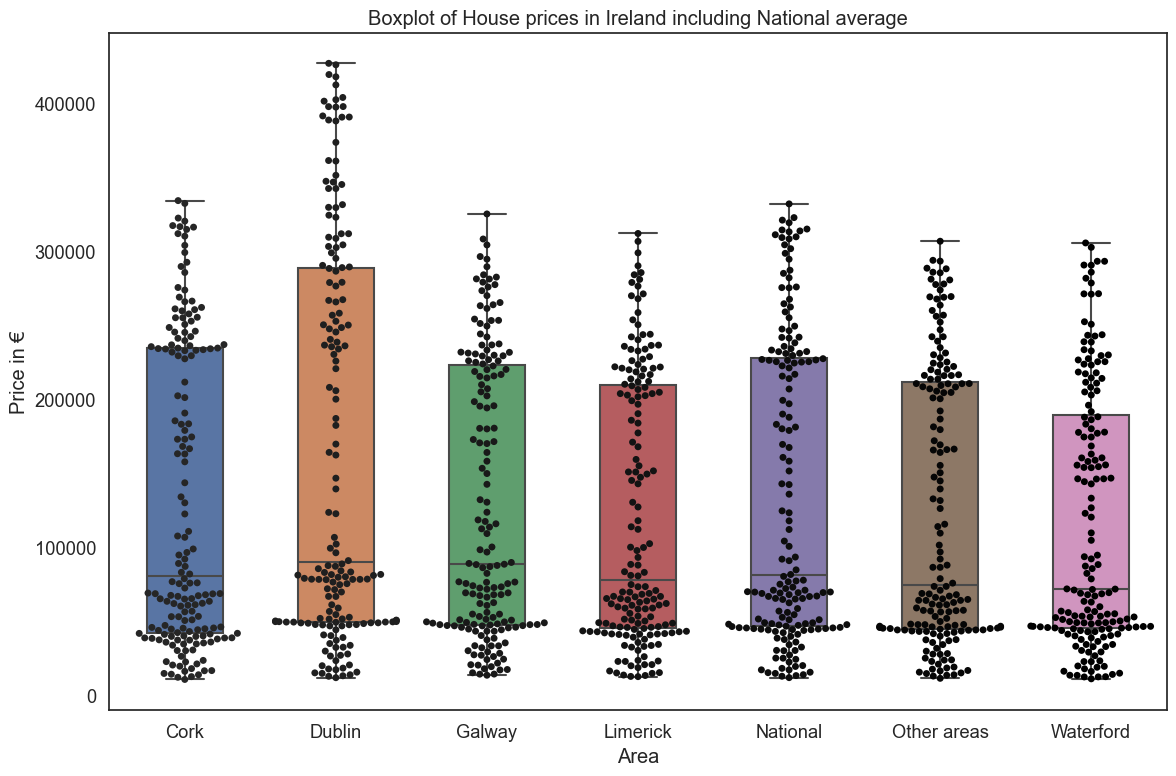

In [19]:
plt.figure(figsize=(12, 8)) # Sets the figure size with the boxplots.
sns.set(style="white", font_scale=1.2) # Adds white in the back of the plots and adjusts the font scale.

# Creates the boxplot for each of the locations
ax = sns.boxplot(data=df_price_ie[['Cork','Dublin','Galway','Limerick','National','Other areas','Waterford']], width=0.5)
ax.set_xticklabels(['Cork','Dublin','Galway','Limerick','National','Other areas','Waterford'])
ax.set_ylabel('Price in €') # Sets y-label
ax.set_title('Boxplot of House prices in Ireland including National average') # Add title to the figure.

# Adds each data points with swarmplot (dots) and the color black was chosen for the dots because of the easy identification
sns.swarmplot(data=df_price_ie[['Cork','Dublin','Galway','Limerick','National',
                                'Other areas','Waterford']], color='black', size=5)
plt.tight_layout() # Adjust the layout
plt.show() # Shows the plot

## Productivity and Labor Market in Construction - Ireland

## Gross Value Added - GVA in Construction

In [21]:
df_gva_ie = pd.read_csv("PIA15.20230504T210557.csv") # Importing the Ireland's Gross Value Added dataset.
display(df_gva_ie) # Displays head, tail and shape of the dataset.

,Statistic Label,Year,Industry Sector,UNIT,VALUE
0,Hours Worked Growth,2000,Construction (F),%,15.5
1,Hours Worked Growth,2001,Construction (F),%,4.7
2,Hours Worked Growth,2002,Construction (F),%,0.7
3,Hours Worked Growth,2003,Construction (F),%,1.9
4,Hours Worked Growth,2004,Construction (F),%,10.0
...,...,...,...,...,...
501,Employment Growth,2017,Construction (F),%,8.3
502,Employment Growth,2018,Construction (F),%,10.7
503,Employment Growth,2019,Construction (F),%,2.5
504,Employment Growth,2020,Construction (F),%,-8.3


In [22]:
df_gva_ie.isnull().sum() # Checking for missing values.

Statistic Label    0
Year               0
Industry Sector    0
UNIT               0
VALUE              0
dtype: int64

In [23]:
df_gva_ie.info() # Checks the type of the variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  506 non-null    object 
 1   Year             506 non-null    int64  
 2   Industry Sector  506 non-null    object 
 3   UNIT             506 non-null    object 
 4   VALUE            506 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.9+ KB


In [24]:
value_counts = df_gva_ie['Statistic Label'].value_counts()
print(value_counts)

Hours Worked Growth                                                        22
Unit Labour Cost Growth                                                    22
Employment                                                                 22
Capital Compensation                                                       22
Labour Compensation                                                        22
Gross Operating Surplus                                                    22
Compensation of Employees                                                  22
Capital Services                                                           22
Labour Productivity                                                        22
Gross Value Added                                                          22
Labour Hours Worked                                                        22
GVA Capital Share                                                          22
Gross Value Added Growth                                        

In [25]:
# Reshaping the dataset, using the statistic label for columns and the Year as index.
df_gva_ie = df_gva_ie.pivot(index="Year", columns="Statistic Label", values="VALUE")
df_gva_ie.head() # Shows the first five rows.

Statistic Label,Capital Compensation,Capital Contribution to GVA Growth,Capital Deepening Contribution to Labour Productivity Growth,Capital Services,Capital Services Growth,Compensation of Employees,Employment,Employment Growth,GVA Capital Share,GVA Labour Share,Gross Operating Surplus,Gross Value Added,Gross Value Added Growth,Hours Worked Growth,Intangible Capital Deepening Contribution to Labour Productivity Growth,Labour Compensation,Labour Contribution to GVA Growth,Labour Hours Worked,Labour Productivity,Labour Productivity Growth,Multifactor Productivity Growth,Tangible Capital Deepening Contribution to Labour Productivity Growth,Unit Labour Cost Growth
Year,,,,,,,,,,,,,,,,,,,,,,,
2000,1271.7,2.0,-1.0,1271.7,10.5,4361.2,144.1,14.7,18.3,81.7,1269.6,8865.9,6.4,15.5,0.0,5659.3,12.5,300.4,29.5,-9.0,-8.1,-1.0,19.4
2001,1620.9,0.9,0.0,1620.9,4.8,5035.1,153.3,6.2,20.1,79.9,1618.2,9148.6,3.1,4.7,0.0,6460.4,3.8,314.9,29.0,-1.6,-1.6,0.0,10.5
2002,1898.9,0.5,0.3,1898.9,2.2,5532.2,155.7,1.5,21.9,78.1,1895.9,9317.5,1.8,0.7,0.0,6772.8,0.6,317.2,29.4,1.1,0.8,0.3,9.0
2003,2337.1,1.4,1.0,2337.1,6.3,6068.5,161.1,3.4,23.5,76.5,2333.3,9900.0,6.1,1.9,0.0,7596.0,1.5,323.3,30.6,4.1,3.1,1.0,2.0
2004,3014.5,2.5,0.1,3014.5,10.2,7068.0,179.4,10.7,25.2,74.8,3009.9,10892.1,9.6,10.0,0.0,8932.6,7.6,357.4,30.5,-0.5,-0.5,0.1,4.1


In [26]:
df_gva_ie.shape # Check the shape of the dataset. 

(22, 23)

In [27]:
df_gva_ie.info() # Checks the type of the variables.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2000 to 2021
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Capital Compensation                                                     22 non-null     float64
 1   Capital Contribution to GVA Growth                                       22 non-null     float64
 2   Capital Deepening Contribution to Labour Productivity Growth             22 non-null     float64
 3   Capital Services                                                         22 non-null     float64
 4   Capital Services Growth                                                  22 non-null     float64
 5   Compensation of Employees                                                22 non-null     float64
 6   Employment                                                             

In [28]:
df_gva_ie.describe() # Displays statistic features.

Statistic Label,Capital Compensation,Capital Contribution to GVA Growth,Capital Deepening Contribution to Labour Productivity Growth,Capital Services,Capital Services Growth,Compensation of Employees,Employment,Employment Growth,GVA Capital Share,GVA Labour Share,Gross Operating Surplus,Gross Value Added,Gross Value Added Growth,Hours Worked Growth,Intangible Capital Deepening Contribution to Labour Productivity Growth,Labour Compensation,Labour Contribution to GVA Growth,Labour Hours Worked,Labour Productivity,Labour Productivity Growth,Multifactor Productivity Growth,Tangible Capital Deepening Contribution to Labour Productivity Growth,Unit Labour Cost Growth
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000
mean,1500.163636,1.177273,-0.009091,1833.259091,3.759091,5014.877273,144.554545,0.495455,20.590909,79.409091,1507.077273,8744.000000,-0.209091,-0.213636,0.045455,6468.163636,-1.395455,275.181818,32.950000,1.614870e-16,-0.013636,-0.063636,1.772727
std,1953.493368,1.303816,2.587315,1359.279919,6.276840,2609.103395,44.892599,14.656592,12.936435,12.936435,1960.591117,2251.992576,12.213494,17.303132,0.162502,3172.910285,15.691626,97.500640,3.875657,7.341273e+00,6.493682,2.515579,11.519225
min,-2870.000000,-1.300000,-4.200000,0.000000,-11.100000,2067.400000,83.500000,-44.500000,0.000000,63.000000,-2870.000000,5423.700000,-31.800000,-52.200000,-0.100000,2849.500000,-52.200000,140.300000,27.400000,-1.100000e+01,-9.200000,-4.200000,-37.100000
25%,732.975000,0.000000,-1.000000,732.975000,0.000000,3086.700000,111.375000,-3.825000,15.875000,71.925000,727.550000,6893.550000,-2.900000,-5.750000,0.000000,4318.875000,-5.775000,203.475000,29.750000,-4.175000e+00,-3.225000,-1.000000,-1.950000
50%,1759.900000,1.150000,0.000000,1759.900000,4.850000,4256.150000,141.250000,3.700000,24.150000,75.850000,1757.050000,8793.300000,4.800000,4.550000,0.000000,5660.250000,3.850000,265.800000,32.250000,-9.000000e-01,-0.700000,0.000000,3.700000
75%,2904.025000,2.250000,0.450000,2904.025000,8.200000,5943.125000,159.750000,10.250000,28.075000,84.125000,2957.775000,9759.125000,7.725000,11.925000,0.000000,7457.125000,7.800000,321.775000,36.150000,3.625000e+00,0.775000,0.450000,8.500000
max,4692.000000,3.200000,9.100000,4692.000000,12.500000,10749.300000,237.500000,14.800000,37.000000,100.000000,4685.200000,12715.400000,10.700000,17.400000,0.700000,13526.300000,12.600000,464.100000,40.400000,2.040000e+01,20.400000,8.800000,19.400000


## KLEMS Indicators

In [29]:
df_klems_ie = pd.read_csv("PIA16.20230504T190535.csv") # Imports the KLEMS indicators dataset.
display(df_klems_ie) # Displays head, tail and shape of the dataset.

,Statistic Label,Year,Industry Sector,UNIT,VALUE
0,Gross Output Growth,2000,Construction (F),%,5.0
1,Gross Output Growth,2001,Construction (F),%,8.5
2,Gross Output Growth,2002,Construction (F),%,0.0
3,Gross Output Growth,2003,Construction (F),%,-2.5
4,Gross Output Growth,2004,Construction (F),%,7.9
...,...,...,...,...,...
369,Gross Output Services Share,2017,Construction (F),%,30.2
370,Gross Output Services Share,2018,Construction (F),%,26.0
371,Gross Output Services Share,2019,Construction (F),%,21.6
372,Gross Output Services Share,2020,Construction (F),%,18.3


In [30]:
df_klems_ie.isnull().sum() # Checking for missing values.

Statistic Label    0
Year               0
Industry Sector    0
UNIT               0
VALUE              0
dtype: int64

In [31]:
df_klems_ie.info() # Checks the type of the variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  374 non-null    object 
 1   Year             374 non-null    int64  
 2   Industry Sector  374 non-null    object 
 3   UNIT             374 non-null    object 
 4   VALUE            374 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.7+ KB


In [32]:
value_counts = df_klems_ie['Statistic Label'].value_counts()
print(value_counts)

Gross Output Growth                              22
Energy Growth                                    22
Gross Output Materials Share                     22
Gross Output Energy Share                        22
Gross Output Capital Share                       22
Gross Output Labour Share                        22
Services Growth                                  22
Materials Growth                                 22
Capital Services Growth                          22
Labour Contribution to Gross Output Growth       22
Hours Worked Growth                              22
KLEMS Multifactor Productivity Growth            22
Services Contribution to Gross Output Growth     22
Materials Contribution to Gross Output Growth    22
Energy Contribution to Gross Output Growth       22
Capital Contribution to Gross Output Growth      22
Gross Output Services Share                      22
Name: Statistic Label, dtype: int64


In [33]:
# Reshaping the dataset, using the statistic label for columns and the Year as index.
df_klems_ie = df_klems_ie.pivot(index="Year", columns="Statistic Label", values="VALUE")
df_klems_ie.head() # Shows the first five rows.

Statistic Label,Capital Contribution to Gross Output Growth,Capital Services Growth,Energy Contribution to Gross Output Growth,Energy Growth,Gross Output Capital Share,Gross Output Energy Share,Gross Output Growth,Gross Output Labour Share,Gross Output Materials Share,Gross Output Services Share,Hours Worked Growth,KLEMS Multifactor Productivity Growth,Labour Contribution to Gross Output Growth,Materials Contribution to Gross Output Growth,Materials Growth,Services Contribution to Gross Output Growth,Services Growth
Year,,,,,,,,,,,,,,,,,
2000,0.9,10.5,-1.3,-23.5,9.0,5.4,5.0,34.2,34.3,17.1,15.5,-3.3,5.4,2.2,6.4,1.1,6.4
2001,0.4,4.8,0.9,17.7,7.9,5.4,8.5,35.2,34.3,17.1,4.7,-0.6,1.6,3.6,10.3,2.6,14.8
2002,0.2,2.2,0.1,1.9,8.3,4.6,0.0,33.2,35.4,18.5,0.7,0.3,0.2,-0.3,-0.8,-0.6,-3.2
2003,0.6,6.3,-0.7,-16.3,9.3,4.5,-2.5,33.1,35.2,18.0,1.9,1.4,0.7,-1.1,-3.3,-3.4,-20.6
2004,1.2,10.2,-1.0,-24.9,10.8,4.3,7.9,35.2,34.8,14.9,10.0,-0.1,3.5,3.6,10.3,0.7,4.8


In [34]:
df_gva_ie.shape # Check the shape of the dataset. 

(22, 23)

In [35]:
df_gva_ie.info() # Checks the type of the variables.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2000 to 2021
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Capital Compensation                                                     22 non-null     float64
 1   Capital Contribution to GVA Growth                                       22 non-null     float64
 2   Capital Deepening Contribution to Labour Productivity Growth             22 non-null     float64
 3   Capital Services                                                         22 non-null     float64
 4   Capital Services Growth                                                  22 non-null     float64
 5   Compensation of Employees                                                22 non-null     float64
 6   Employment                                                             

In [36]:
df_gva_ie.describe() # Displays statistic features.

Statistic Label,Capital Compensation,Capital Contribution to GVA Growth,Capital Deepening Contribution to Labour Productivity Growth,Capital Services,Capital Services Growth,Compensation of Employees,Employment,Employment Growth,GVA Capital Share,GVA Labour Share,Gross Operating Surplus,Gross Value Added,Gross Value Added Growth,Hours Worked Growth,Intangible Capital Deepening Contribution to Labour Productivity Growth,Labour Compensation,Labour Contribution to GVA Growth,Labour Hours Worked,Labour Productivity,Labour Productivity Growth,Multifactor Productivity Growth,Tangible Capital Deepening Contribution to Labour Productivity Growth,Unit Labour Cost Growth
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000
mean,1500.163636,1.177273,-0.009091,1833.259091,3.759091,5014.877273,144.554545,0.495455,20.590909,79.409091,1507.077273,8744.000000,-0.209091,-0.213636,0.045455,6468.163636,-1.395455,275.181818,32.950000,1.614870e-16,-0.013636,-0.063636,1.772727
std,1953.493368,1.303816,2.587315,1359.279919,6.276840,2609.103395,44.892599,14.656592,12.936435,12.936435,1960.591117,2251.992576,12.213494,17.303132,0.162502,3172.910285,15.691626,97.500640,3.875657,7.341273e+00,6.493682,2.515579,11.519225
min,-2870.000000,-1.300000,-4.200000,0.000000,-11.100000,2067.400000,83.500000,-44.500000,0.000000,63.000000,-2870.000000,5423.700000,-31.800000,-52.200000,-0.100000,2849.500000,-52.200000,140.300000,27.400000,-1.100000e+01,-9.200000,-4.200000,-37.100000
25%,732.975000,0.000000,-1.000000,732.975000,0.000000,3086.700000,111.375000,-3.825000,15.875000,71.925000,727.550000,6893.550000,-2.900000,-5.750000,0.000000,4318.875000,-5.775000,203.475000,29.750000,-4.175000e+00,-3.225000,-1.000000,-1.950000
50%,1759.900000,1.150000,0.000000,1759.900000,4.850000,4256.150000,141.250000,3.700000,24.150000,75.850000,1757.050000,8793.300000,4.800000,4.550000,0.000000,5660.250000,3.850000,265.800000,32.250000,-9.000000e-01,-0.700000,0.000000,3.700000
75%,2904.025000,2.250000,0.450000,2904.025000,8.200000,5943.125000,159.750000,10.250000,28.075000,84.125000,2957.775000,9759.125000,7.725000,11.925000,0.000000,7457.125000,7.800000,321.775000,36.150000,3.625000e+00,0.775000,0.450000,8.500000
max,4692.000000,3.200000,9.100000,4692.000000,12.500000,10749.300000,237.500000,14.800000,37.000000,100.000000,4685.200000,12715.400000,10.700000,17.400000,0.700000,13526.300000,12.600000,464.100000,40.400000,2.040000e+01,20.400000,8.800000,19.400000


## qali Indicators

In [37]:
df_qali_ie = pd.read_csv("PIA17.20230504T210512.csv") # Imports QALI indicators dataset.
display(df_qali_ie) # Display head, tail and shape of the dataset.

,Statistic Label,Year,Industry Sector,UNIT,VALUE
0,Hours Worked Growth,2000,Construction (F),%,15.5
1,Hours Worked Growth,2001,Construction (F),%,4.7
2,Hours Worked Growth,2002,Construction (F),%,0.7
3,Hours Worked Growth,2003,Construction (F),%,1.9
4,Hours Worked Growth,2004,Construction (F),%,10.0
...,...,...,...,...,...
61,QALI Growth,2017,Construction (F),%,8.7
62,QALI Growth,2018,Construction (F),%,16.0
63,QALI Growth,2019,Construction (F),%,3.9
64,QALI Growth,2020,Construction (F),%,-22.7


In [41]:
df_qali_ie.isnull().sum() # Checking for missing values.

Statistic Label    0
Year               0
Industry Sector    0
UNIT               0
VALUE              0
dtype: int64

In [42]:
value_counts = df_qali_ie['Statistic Label'].value_counts()
print(value_counts)

Hours Worked Growth          22
Labour Composition Growth    22
QALI Growth                  22
Name: Statistic Label, dtype: int64


In [43]:
# Reshaping the dataset, using the statistic label for columns and the Year as index.
df_qali_ie = df_qali_ie.pivot(index="Year", columns="Statistic Label", values="VALUE")
df_qali_ie.head() # Displays the first five rows.

Statistic Label,Hours Worked Growth,Labour Composition Growth,QALI Growth
Year,,,
2000,15.5,-0.1,15.3
2001,4.7,0.2,5.0
2002,0.7,0.0,0.7
2003,1.9,-0.6,1.3
2004,10.0,1.4,11.5


In [44]:
df_gva_ie.shape # Check the shape of the dataset.

(22, 23)

In [45]:
df_gva_ie.info() # Checks the type of the variables.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2000 to 2021
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Capital Compensation                                                     22 non-null     float64
 1   Capital Contribution to GVA Growth                                       22 non-null     float64
 2   Capital Deepening Contribution to Labour Productivity Growth             22 non-null     float64
 3   Capital Services                                                         22 non-null     float64
 4   Capital Services Growth                                                  22 non-null     float64
 5   Compensation of Employees                                                22 non-null     float64
 6   Employment                                                             

In [46]:
df_gva_ie.describe() # Displays statistic features

Statistic Label,Capital Compensation,Capital Contribution to GVA Growth,Capital Deepening Contribution to Labour Productivity Growth,Capital Services,Capital Services Growth,Compensation of Employees,Employment,Employment Growth,GVA Capital Share,GVA Labour Share,Gross Operating Surplus,Gross Value Added,Gross Value Added Growth,Hours Worked Growth,Intangible Capital Deepening Contribution to Labour Productivity Growth,Labour Compensation,Labour Contribution to GVA Growth,Labour Hours Worked,Labour Productivity,Labour Productivity Growth,Multifactor Productivity Growth,Tangible Capital Deepening Contribution to Labour Productivity Growth,Unit Labour Cost Growth
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000
mean,1500.163636,1.177273,-0.009091,1833.259091,3.759091,5014.877273,144.554545,0.495455,20.590909,79.409091,1507.077273,8744.000000,-0.209091,-0.213636,0.045455,6468.163636,-1.395455,275.181818,32.950000,1.614870e-16,-0.013636,-0.063636,1.772727
std,1953.493368,1.303816,2.587315,1359.279919,6.276840,2609.103395,44.892599,14.656592,12.936435,12.936435,1960.591117,2251.992576,12.213494,17.303132,0.162502,3172.910285,15.691626,97.500640,3.875657,7.341273e+00,6.493682,2.515579,11.519225
min,-2870.000000,-1.300000,-4.200000,0.000000,-11.100000,2067.400000,83.500000,-44.500000,0.000000,63.000000,-2870.000000,5423.700000,-31.800000,-52.200000,-0.100000,2849.500000,-52.200000,140.300000,27.400000,-1.100000e+01,-9.200000,-4.200000,-37.100000
25%,732.975000,0.000000,-1.000000,732.975000,0.000000,3086.700000,111.375000,-3.825000,15.875000,71.925000,727.550000,6893.550000,-2.900000,-5.750000,0.000000,4318.875000,-5.775000,203.475000,29.750000,-4.175000e+00,-3.225000,-1.000000,-1.950000
50%,1759.900000,1.150000,0.000000,1759.900000,4.850000,4256.150000,141.250000,3.700000,24.150000,75.850000,1757.050000,8793.300000,4.800000,4.550000,0.000000,5660.250000,3.850000,265.800000,32.250000,-9.000000e-01,-0.700000,0.000000,3.700000
75%,2904.025000,2.250000,0.450000,2904.025000,8.200000,5943.125000,159.750000,10.250000,28.075000,84.125000,2957.775000,9759.125000,7.725000,11.925000,0.000000,7457.125000,7.800000,321.775000,36.150000,3.625000e+00,0.775000,0.450000,8.500000
max,4692.000000,3.200000,9.100000,4692.000000,12.500000,10749.300000,237.500000,14.800000,37.000000,100.000000,4685.200000,12715.400000,10.700000,17.400000,0.700000,13526.300000,12.600000,464.100000,40.400000,2.040000e+01,20.400000,8.800000,19.400000


## Every single dataset has quaterly datasets

- Prices (stand alone?????) 1975 - 2022
- Employment 2000 - 2022
- Production 2000 - 2022
- Building Permit (m2) - 2000 - 2022
- GVA 1995 - 2022 

## House Prices in Ireland and other Countries

In [47]:
df_prices = pd.read_csv("DP_LIVE_05052023193108061.csv") # Imports the House prices dataset.
display(df_prices) # Displays head, tail and shape. 

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,BEL,HOUSECOST,REAL,IDX2015,Q,1975-Q1,40.303763,NaN
1,BEL,HOUSECOST,REAL,IDX2015,Q,1975-Q2,40.850524,NaN
2,BEL,HOUSECOST,REAL,IDX2015,Q,1975-Q3,41.188720,NaN
3,BEL,HOUSECOST,REAL,IDX2015,Q,1975-Q4,42.728474,NaN
4,BEL,HOUSECOST,REAL,IDX2015,Q,1976-Q1,45.230444,NaN
...,...,...,...,...,...,...,...,...
1146,NOR,HOUSECOST,REAL,IDX2015,Q,2021-Q4,117.800208,NaN
1147,NOR,HOUSECOST,REAL,IDX2015,Q,2022-Q1,120.844463,NaN
1148,NOR,HOUSECOST,REAL,IDX2015,Q,2022-Q2,119.854129,NaN
1149,NOR,HOUSECOST,REAL,IDX2015,Q,2022-Q3,116.923962,NaN


In [48]:
df_prices.isnull().sum() # Checks for missing values.

LOCATION         0
INDICATOR        0
SUBJECT          0
MEASURE          0
FREQUENCY        0
TIME             0
Value            0
Flag Codes    1151
dtype: int64

In [49]:
df_gva_ie.info() # Checks the type of the variables.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2000 to 2021
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Capital Compensation                                                     22 non-null     float64
 1   Capital Contribution to GVA Growth                                       22 non-null     float64
 2   Capital Deepening Contribution to Labour Productivity Growth             22 non-null     float64
 3   Capital Services                                                         22 non-null     float64
 4   Capital Services Growth                                                  22 non-null     float64
 5   Compensation of Employees                                                22 non-null     float64
 6   Employment                                                             

In [50]:
df_gva_ie.describe() # Displays statistic features

Statistic Label,Capital Compensation,Capital Contribution to GVA Growth,Capital Deepening Contribution to Labour Productivity Growth,Capital Services,Capital Services Growth,Compensation of Employees,Employment,Employment Growth,GVA Capital Share,GVA Labour Share,Gross Operating Surplus,Gross Value Added,Gross Value Added Growth,Hours Worked Growth,Intangible Capital Deepening Contribution to Labour Productivity Growth,Labour Compensation,Labour Contribution to GVA Growth,Labour Hours Worked,Labour Productivity,Labour Productivity Growth,Multifactor Productivity Growth,Tangible Capital Deepening Contribution to Labour Productivity Growth,Unit Labour Cost Growth
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000
mean,1500.163636,1.177273,-0.009091,1833.259091,3.759091,5014.877273,144.554545,0.495455,20.590909,79.409091,1507.077273,8744.000000,-0.209091,-0.213636,0.045455,6468.163636,-1.395455,275.181818,32.950000,1.614870e-16,-0.013636,-0.063636,1.772727
std,1953.493368,1.303816,2.587315,1359.279919,6.276840,2609.103395,44.892599,14.656592,12.936435,12.936435,1960.591117,2251.992576,12.213494,17.303132,0.162502,3172.910285,15.691626,97.500640,3.875657,7.341273e+00,6.493682,2.515579,11.519225
min,-2870.000000,-1.300000,-4.200000,0.000000,-11.100000,2067.400000,83.500000,-44.500000,0.000000,63.000000,-2870.000000,5423.700000,-31.800000,-52.200000,-0.100000,2849.500000,-52.200000,140.300000,27.400000,-1.100000e+01,-9.200000,-4.200000,-37.100000
25%,732.975000,0.000000,-1.000000,732.975000,0.000000,3086.700000,111.375000,-3.825000,15.875000,71.925000,727.550000,6893.550000,-2.900000,-5.750000,0.000000,4318.875000,-5.775000,203.475000,29.750000,-4.175000e+00,-3.225000,-1.000000,-1.950000
50%,1759.900000,1.150000,0.000000,1759.900000,4.850000,4256.150000,141.250000,3.700000,24.150000,75.850000,1757.050000,8793.300000,4.800000,4.550000,0.000000,5660.250000,3.850000,265.800000,32.250000,-9.000000e-01,-0.700000,0.000000,3.700000
75%,2904.025000,2.250000,0.450000,2904.025000,8.200000,5943.125000,159.750000,10.250000,28.075000,84.125000,2957.775000,9759.125000,7.725000,11.925000,0.000000,7457.125000,7.800000,321.775000,36.150000,3.625000e+00,0.775000,0.450000,8.500000
max,4692.000000,3.200000,9.100000,4692.000000,12.500000,10749.300000,237.500000,14.800000,37.000000,100.000000,4685.200000,12715.400000,10.700000,17.400000,0.700000,13526.300000,12.600000,464.100000,40.400000,2.040000e+01,20.400000,8.800000,19.400000


## Employment in Ireland and other Countries

In [51]:
df_employ = pd.read_csv("DP_LIVE_05052023184942383.csv") # Imports the employment (6 coutries) dataset. 
display(df_employ) # Displays the head, tail and shape. 

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EMPINDUS,CONSTR,THND_PER,Q,1985-Q1,474.5540,NaN
1,AUS,EMPINDUS,CONSTR,THND_PER,Q,1985-Q2,483.0865,NaN
2,AUS,EMPINDUS,CONSTR,THND_PER,Q,1985-Q3,485.2054,NaN
3,AUS,EMPINDUS,CONSTR,THND_PER,Q,1985-Q4,481.3309,NaN
4,AUS,EMPINDUS,CONSTR,THND_PER,Q,1986-Q1,464.8127,NaN
...,...,...,...,...,...,...,...,...
4158,CRI,EMPINDUS,CONSTR,THND_PER,Q,2021-Q4,111.4110,NaN
4159,CRI,EMPINDUS,CONSTR,THND_PER,Q,2022-Q1,127.6930,NaN
4160,CRI,EMPINDUS,CONSTR,THND_PER,Q,2022-Q2,125.5660,NaN
4161,CRI,EMPINDUS,CONSTR,THND_PER,Q,2022-Q3,155.0060,NaN


- The employment data was downloaded with all the countries,  so the next line of code will select only he countries that being analysed which is Netherlands, Belgium, Denmark, Finland, Ireland and Norway.  

In [52]:
countries_to_select = ['NLD', 'BEL', 'DNK', 'FIN', 'IRL', 'NOR']  # Creating a list of countries to select.
df_employ = df_employ[df_employ['LOCATION'].isin(countries_to_select)] #isin creating a boolean to return only the countries selected.
display(df_employ) # Displays head, tail and shape of the dataset to check the command applied and its new shape.

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
248,BEL,EMPINDUS,CONSTR,THND_PER,Q,1999-Q1,270.7,NaN
249,BEL,EMPINDUS,CONSTR,THND_PER,Q,1999-Q2,248.8,NaN
250,BEL,EMPINDUS,CONSTR,THND_PER,Q,1999-Q3,280.5,NaN
251,BEL,EMPINDUS,CONSTR,THND_PER,Q,1999-Q4,291.0,NaN
252,BEL,EMPINDUS,CONSTR,THND_PER,Q,2000-Q1,261.4,NaN
...,...,...,...,...,...,...,...,...
2093,NOR,EMPINDUS,CONSTR,THND_PER,Q,2021-Q4,236.5,NaN
2094,NOR,EMPINDUS,CONSTR,THND_PER,Q,2022-Q1,243.0,NaN
2095,NOR,EMPINDUS,CONSTR,THND_PER,Q,2022-Q2,240.8,NaN
2096,NOR,EMPINDUS,CONSTR,THND_PER,Q,2022-Q3,233.0,NaN


In [53]:
df_employ.isnull().sum() # Checks for missing values.

LOCATION        0
INDICATOR       0
SUBJECT         0
MEASURE         0
FREQUENCY       0
TIME            0
Value           0
Flag Codes    577
dtype: int64

In [54]:
rows_with_missing_values = df_employ[df_employ.isna().any(axis=1)] # Locate rows with missing values
print(rows_with_missing_values) # Display rows with missing values

     LOCATION INDICATOR SUBJECT   MEASURE FREQUENCY     TIME  Value Flag Codes
248       BEL  EMPINDUS  CONSTR  THND_PER         Q  1999-Q1  270.7        NaN
249       BEL  EMPINDUS  CONSTR  THND_PER         Q  1999-Q2  248.8        NaN
250       BEL  EMPINDUS  CONSTR  THND_PER         Q  1999-Q3  280.5        NaN
251       BEL  EMPINDUS  CONSTR  THND_PER         Q  1999-Q4  291.0        NaN
252       BEL  EMPINDUS  CONSTR  THND_PER         Q  2000-Q1  261.4        NaN
...       ...       ...     ...       ...       ...      ...    ...        ...
2093      NOR  EMPINDUS  CONSTR  THND_PER         Q  2021-Q4  236.5        NaN
2094      NOR  EMPINDUS  CONSTR  THND_PER         Q  2022-Q1  243.0        NaN
2095      NOR  EMPINDUS  CONSTR  THND_PER         Q  2022-Q2  240.8        NaN
2096      NOR  EMPINDUS  CONSTR  THND_PER         Q  2022-Q3  233.0        NaN
2097      NOR  EMPINDUS  CONSTR  THND_PER         Q  2022-Q4  229.2        NaN

[577 rows x 8 columns]


In [55]:
# Pivoting, using time as index, location as new columns and assigning the values to the right quarter. 
df_employ = df_employ.pivot(index='TIME', columns='LOCATION', values='Value')
display(df_employ) # Displays head, tail and shape of the dataset to check the command applied, also the new shape.

LOCATION,BEL,DNK,FIN,IRL,NLD,NOR
TIME,,,,,,
1998-Q1,NaN,NaN,131.8345,NaN,NaN,NaN
1998-Q2,NaN,179.1736,131.6632,126.2294,NaN,NaN
1998-Q3,NaN,181.4361,139.2066,128.8369,NaN,NaN
1998-Q4,NaN,183.2484,140.6957,132.4804,NaN,NaN
1999-Q1,270.7,185.1538,145.1814,137.1355,NaN,NaN
...,...,...,...,...,...,...
2021-Q4,310.9,191.4664,185.3855,152.8387,391.2,236.5
2022-Q1,318.9,205.0974,187.1955,160.3617,395.2,243.0
2022-Q2,312.7,209.7298,188.1978,167.7926,415.4,240.8


## Production in Construction Ireland and other Countries

In [56]:
df_prod = pd.read_csv("sts_copr_q__custom_6094843_linear.csv") # Imports the production dataset. 
display(df_prod) # Displays the head, tail and shape of the dataset.

,DATAFLOW,LAST UPDATE,freq,indic_bt,nace_r2,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:STS_COPR_Q(1.0),05/05/23 11:00:00,Q,PROD,F,SCA,I15,BE,2000-Q1,97.1,NaN
1,ESTAT:STS_COPR_Q(1.0),05/05/23 11:00:00,Q,PROD,F,SCA,I15,BE,2000-Q2,98.4,NaN
2,ESTAT:STS_COPR_Q(1.0),05/05/23 11:00:00,Q,PROD,F,SCA,I15,BE,2000-Q3,98.5,NaN
3,ESTAT:STS_COPR_Q(1.0),05/05/23 11:00:00,Q,PROD,F,SCA,I15,BE,2000-Q4,99.2,NaN
4,ESTAT:STS_COPR_Q(1.0),05/05/23 11:00:00,Q,PROD,F,SCA,I15,BE,2001-Q1,97.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
568,ESTAT:STS_COPR_Q(1.0),05/05/23 11:00:00,Q,PROD,F,SCA,I15,NO,2022-Q1,123.2,NaN
569,ESTAT:STS_COPR_Q(1.0),05/05/23 11:00:00,Q,PROD,F,SCA,I15,NO,2022-Q2,124.1,NaN
570,ESTAT:STS_COPR_Q(1.0),05/05/23 11:00:00,Q,PROD,F,SCA,I15,NO,2022-Q3,123.0,NaN
571,ESTAT:STS_COPR_Q(1.0),05/05/23 11:00:00,Q,PROD,F,SCA,I15,NO,2022-Q4,123.9,NaN


- Different sources, the first two from eurostat and this from oecd, last 2 datasets country codes with 3 letters now with 2.

In [57]:
df_prod.isnull().sum() # Checking for missing values.

DATAFLOW         0
LAST UPDATE      0
freq             0
indic_bt         0
nace_r2          0
s_adj            0
unit             0
geo              0
TIME_PERIOD      0
OBS_VALUE        0
OBS_FLAG       352
dtype: int64

In [58]:
# Pivoting, using time period as index, geo as new columns and assigning the values to the right quarter. 
df_prod = df_prod.pivot(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')
display(df_prod) # Display the pivoted dataset and the new shape.

geo,BE,DK,FI,IE,NL,NO
TIME_PERIOD,,,,,,
1995-Q1,NaN,NaN,42.2,NaN,NaN,NaN
1995-Q2,NaN,NaN,42.5,NaN,NaN,NaN
1995-Q3,NaN,NaN,42.7,NaN,NaN,NaN
1995-Q4,NaN,NaN,42.9,NaN,NaN,NaN
1996-Q1,NaN,NaN,44.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-Q1,99.3,133.1,121.6,135.5,135.2,123.2
2022-Q2,99.0,133.4,121.3,131.5,134.8,124.1
2022-Q3,99.3,132.9,119.8,129.1,135.6,123.0


In [59]:
df_prod.describe() # Shows descriptive statistics

geo,BE,DK,FI,IE,NL,NO
count,92.000000,92.000000,112.000000,92.000000,92.000000,93.000000
mean,101.042391,101.981522,85.317857,172.402174,112.123913,90.993548
std,3.437966,12.414454,22.619800,84.990736,12.157044,19.233490
min,91.100000,85.700000,42.200000,73.000000,88.300000,63.000000
25%,98.475000,92.100000,66.200000,101.425000,103.800000,78.100000
50%,100.800000,98.650000,90.250000,138.450000,110.550000,87.500000
75%,103.525000,109.150000,101.725000,227.425000,122.200000,106.700000
max,108.400000,133.500000,121.600000,347.600000,139.600000,124.100000


## Building permit index to show the future development of construction (useful area measured in square meters) - explanatory note of the dataset

In [60]:
df_perm = pd.read_csv("sts_cobp_q__custom_6095053_linear.csv") # Imports the building permit dataset.
display(df_perm) # Displays the head, tail and shape. 

,DATAFLOW,LAST UPDATE,freq,indic_bt,cpa2_1,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:STS_COBP_Q(1.0),05/05/23 11:00:00,Q,PSQM,CPA_F41001_41002,SCA,I15,BE,2000-Q1,116.4,s
1,ESTAT:STS_COBP_Q(1.0),05/05/23 11:00:00,Q,PSQM,CPA_F41001_41002,SCA,I15,BE,2000-Q2,112.4,s
2,ESTAT:STS_COBP_Q(1.0),05/05/23 11:00:00,Q,PSQM,CPA_F41001_41002,SCA,I15,BE,2000-Q3,117.5,s
3,ESTAT:STS_COBP_Q(1.0),05/05/23 11:00:00,Q,PSQM,CPA_F41001_41002,SCA,I15,BE,2000-Q4,114.1,s
4,ESTAT:STS_COBP_Q(1.0),05/05/23 11:00:00,Q,PSQM,CPA_F41001_41002,SCA,I15,BE,2001-Q1,112.1,s
...,...,...,...,...,...,...,...,...,...,...,...
543,ESTAT:STS_COBP_Q(1.0),05/05/23 11:00:00,Q,PSQM,CPA_F41001_41002,SCA,I15,NO,2020-Q4,105.3,NaN
544,ESTAT:STS_COBP_Q(1.0),05/05/23 11:00:00,Q,PSQM,CPA_F41001_41002,SCA,I15,NO,2021-Q1,100.0,NaN
545,ESTAT:STS_COBP_Q(1.0),05/05/23 11:00:00,Q,PSQM,CPA_F41001_41002,SCA,I15,NO,2021-Q2,111.2,NaN
546,ESTAT:STS_COBP_Q(1.0),05/05/23 11:00:00,Q,PSQM,CPA_F41001_41002,SCA,I15,NO,2021-Q3,97.4,NaN


- Dataset from oecd - country code with 2 letters.

In [61]:
df_perm.isnull().sum() # Checking for missing values.

DATAFLOW         0
LAST UPDATE      0
freq             0
indic_bt         0
cpa2_1           0
s_adj            0
unit             0
geo              0
TIME_PERIOD      0
OBS_VALUE        0
OBS_FLAG       264
dtype: int64

In [62]:
df_perm.describe()

,OBS_VALUE
count,548.000000
mean,139.642701
std,80.055604
min,53.800000
25%,99.700000
50%,117.650000
75%,141.450000
max,555.300000


In [63]:
# Pivoting, using time period as index, geo as new columns and assigning the values to the right quarter.
df_perm = df_perm.pivot(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')
display(df_perm) # Displays the result of the pivot command. 

geo,BE,DK,FI,IE,NL,NO
TIME_PERIOD,,,,,,
2000-Q1,116.4,126.6,148.2,371.8,252.9,78.1
2000-Q2,112.4,133.2,130.0,373.1,235.5,68.0
2000-Q3,117.5,134.2,126.4,405.2,194.5,77.2
2000-Q4,114.1,138.1,130.6,409.9,180.7,86.3
2001-Q1,112.1,143.7,128.8,421.0,227.4,80.1
...,...,...,...,...,...,...
2021-Q4,132.5,135.2,115.9,207.0,141.0,110.7
2022-Q1,112.7,128.9,110.2,174.4,125.2,NaN
2022-Q2,107.8,115.6,94.4,164.1,125.3,NaN


## Gross Value Added (GVA) in construction sector in Ireland and selected countries.

In [64]:
df_gva = pd.read_csv("namq_10_a10__custom_6095452_linear.csv") # Imports the gross value added dataset. 
display(df_gva) # Displays the head, tail and shape. 

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,nace_r2,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:NAMQ_10_A10(1.0),02/05/23 23:00:00,Q,CP_MEUR,SCA,F,B1G,BE,1995-Q1,2662.2,NaN
1,ESTAT:NAMQ_10_A10(1.0),02/05/23 23:00:00,Q,CP_MEUR,SCA,F,B1G,BE,1995-Q2,2651.6,NaN
2,ESTAT:NAMQ_10_A10(1.0),02/05/23 23:00:00,Q,CP_MEUR,SCA,F,B1G,BE,1995-Q3,2605.9,NaN
3,ESTAT:NAMQ_10_A10(1.0),02/05/23 23:00:00,Q,CP_MEUR,SCA,F,B1G,BE,1995-Q4,2587.6,NaN
4,ESTAT:NAMQ_10_A10(1.0),02/05/23 23:00:00,Q,CP_MEUR,SCA,F,B1G,BE,1996-Q1,2506.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...
755,ESTAT:NAMQ_10_A10(1.0),02/05/23 23:00:00,Q,CP_MEUR,SCA,F,B1G,NO,2021-Q4,6057.1,NaN
756,ESTAT:NAMQ_10_A10(1.0),02/05/23 23:00:00,Q,CP_MEUR,SCA,F,B1G,NO,2022-Q1,6245.2,NaN
757,ESTAT:NAMQ_10_A10(1.0),02/05/23 23:00:00,Q,CP_MEUR,SCA,F,B1G,NO,2022-Q2,6087.5,NaN
758,ESTAT:NAMQ_10_A10(1.0),02/05/23 23:00:00,Q,CP_MEUR,SCA,F,B1G,NO,2022-Q3,6083.6,NaN


In [65]:
df_gva.isnull().sum() # Checking for missing values.

DATAFLOW         0
LAST UPDATE      0
freq             0
unit             0
s_adj            0
nace_r2          0
na_item          0
geo              0
TIME_PERIOD      0
OBS_VALUE        0
OBS_FLAG       736
dtype: int64

In [66]:
# Find the rows with missing values.
rows_with_missing_values_gva = df_gva[df_gva.isna().any(axis=1)]
# Displays the observations with missing values
print(rows_with_missing_values_gva)

                   DATAFLOW        LAST UPDATE freq     unit s_adj nace_r2  \
0    ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
1    ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
2    ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
3    ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
4    ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
..                      ...                ...  ...      ...   ...     ...   
755  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
756  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
757  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
758  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
759  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   

    na_item geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
0       B1G  

In [67]:
df_gva.describe()

,OBS_VALUE
count,760.000000
mean,3299.479079
std,2122.055395
min,403.900000
25%,1660.875000
50%,2851.000000
75%,4636.325000
max,10277.200000
